## Nama : Fauzan Taufik

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
calendarDF = pd.read_csv('calendar.csv', parse_dates = ['date'], index_col='date')

In [4]:
calendarDF.head()

,listing_id,available,price
date,,,
2017-09-05,12147973,f,NaN
2017-09-04,12147973,f,NaN
2017-09-03,12147973,f,NaN
2017-09-02,12147973,f,NaN
2017-09-01,12147973,f,NaN


In [5]:
"""Create DataFrame th show Nunique and %Missing Value for every unique Listing Id"""

unik_listing_id = calendarDF.listing_id.unique()
value_counts_df = calendarDF.listing_id.value_counts()
nunique = []
Missing = []
for id_ in unik_listing_id :
    nunique.append(calendarDF[calendarDF.listing_id==id_].nunique()['price'])
    Missing.append(calendarDF[calendarDF.listing_id==id_].isnull().sum()['price']/value_counts_df[id_])
df_id = pd.DataFrame({'Id':unik_listing_id, 'Nunique':nunique, '%missing' : Missing})

In [6]:
df_id.head(7)

,Id,Nunique,%missing
0,12147973,0,1.000000
1,3075044,2,0.016438
2,6976,1,0.126027
3,1436513,1,0.731507
4,7651065,1,0.084932
5,12386020,1,0.841096
6,5706985,9,0.057534


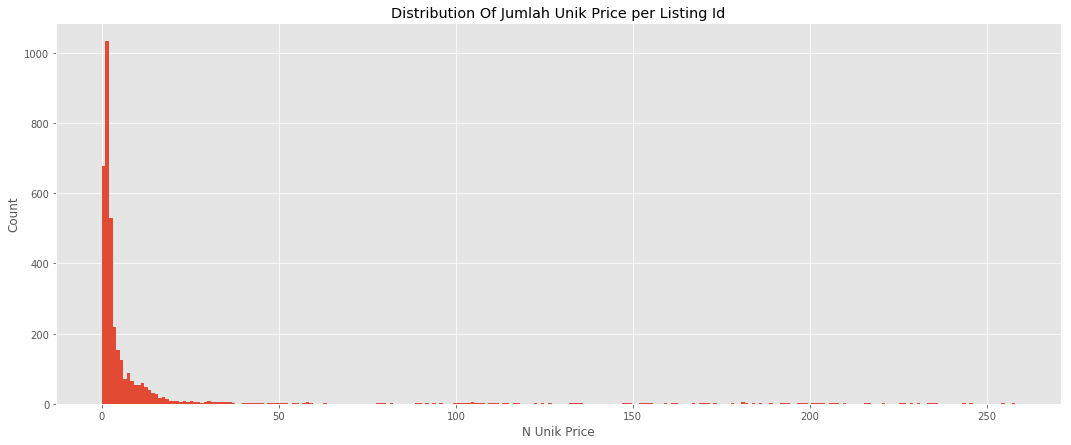

In [7]:
plt.figure(figsize=(18, 7))
plt.style.use('ggplot')
plt.hist(df_id.Nunique, bins=260)
plt.title('Distribution Of Jumlah Unik Price per Listing Id')
plt.xlabel('N Unik Price')
plt.ylabel('Count')
plt.show()

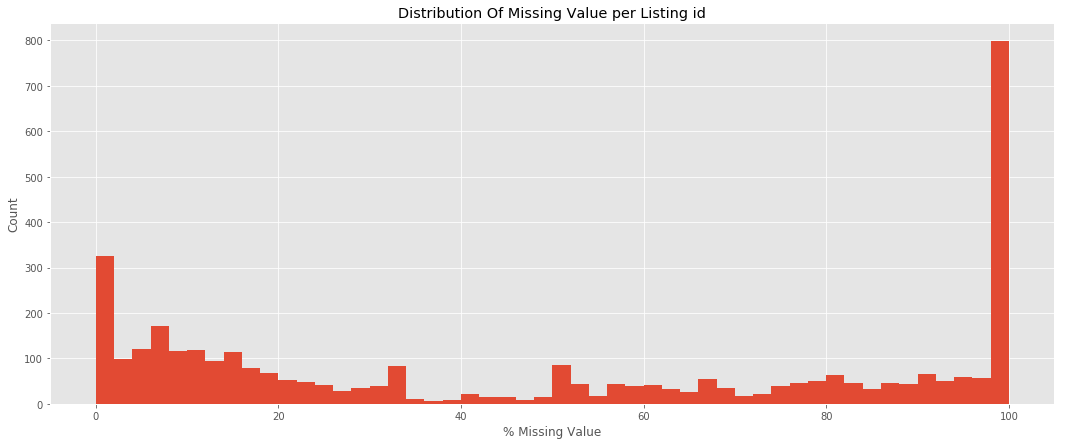

In [8]:
plt.figure(figsize=(18, 7))
plt.style.use('ggplot')
plt.hist(df_id['%missing']*100, bins=50)
plt.title('Distribution Of Missing Value per Listing id')
plt.xlabel('% Missing Value')
plt.ylabel('Count')
plt.show()

In [9]:
## Dari 2 gambar di atas menunjukan bahwa kita memiliki banyak missing value, dan banyk suatu id value memiliki nilai missing value 100^
## Kemudian distribusi nilai unik dari harga pada setiap listing_id hampir uniform, artinya listing_id tidak mempunyai berbagai macam harga, bahkan banyak yg satu listing_id mempunyai satu harga saja
## jadi saya akan mengisi nilai missing value berdasarkan nilai rata2 dari harga berdasarkan listing id

In [11]:
"""Manipulation price data to remove dollar symbol"""

import re
copy_df = calendarDF.dropna().copy()
pattern = r"\d+[.]\d+"
copy_df['price_2'] = calendarDF['price'].dropna().apply(lambda row : re.findall(pattern, row)[0])

In [12]:
copy_df.head()

,listing_id,available,price,price_2
date,,,,
2017-08-22,3075044,t,$65.00,65.00
2017-08-21,3075044,t,$65.00,65.00
2017-08-20,3075044,t,$65.00,65.00
2017-08-19,3075044,t,$75.00,75.00
2017-08-18,3075044,t,$75.00,75.00


In [13]:
"""Mean price for every unique Listing ID"""

copy_df['price_2'] = copy_df.price_2.astype(float)
mean_of_listing_id = copy_df.groupby('listing_id')['price_2'].mean()

In [182]:
mean_of_listing_id.head()

listing_id
3353     35.204819
5506    147.267442
6695    197.407407
6976     65.000000
8792    154.000000
Name: price_2, dtype: float64

In [15]:
"""Get Index for Every Missing Value"""

missing_100 = df_id[df_id['%missing']==1.00].Id
unik_without_100missing = set(unik_listing_id)-set(missing_100)

In [16]:
"""FIlling Missing Value base on their listing id"""

for id_ in unik_without_100missing :
    calendarDF.loc[calendarDF['listing_id'] == id_, 'price'] = calendarDF.loc[calendarDF['listing_id'] == id_, 'price'].fillna(mean_of_listing_id[id_])

In [17]:
#drop the rest of nan values, because the listing_id of that values are 100% missing
calendarDF.dropna(inplace=True)
calendarDF['price'] = calendarDF['price'].apply(lambda row : re.findall(pattern, str(row))[0])
calendarDF.price = calendarDF.price.astype('float')

calendarDF.to_csv('calendar_lengkap.csv')

In [3]:
calendarDF = pd.read_csv('calendar_lengkap.csv')

In [4]:
calendarDF['Year'],calendarDF['Month'],calendarDF['Day']=calendarDF['date'].str.split('-',2).str
calendarDF.head()

,date,listing_id,available,price,Year,Month,Day
0,2017-08-22,3075044,t,65.0,2017,08,22
1,2017-08-21,3075044,t,65.0,2017,08,21
2,2017-08-20,3075044,t,65.0,2017,08,20
3,2017-08-19,3075044,t,75.0,2017,08,19
4,2017-08-18,3075044,t,75.0,2017,08,18


In [5]:
calendarDF.date = pd.to_datetime(calendarDF.date)
calendarDF.index = calendarDF.date
calendarDF.drop('date', axis=1, inplace=True)

In [6]:
calendarDF.head()

,listing_id,available,price,Year,Month,Day
date,,,,,,
2017-08-22,3075044,t,65.0,2017,08,22
2017-08-21,3075044,t,65.0,2017,08,21
2017-08-20,3075044,t,65.0,2017,08,20
2017-08-19,3075044,t,75.0,2017,08,19
2017-08-18,3075044,t,75.0,2017,08,18


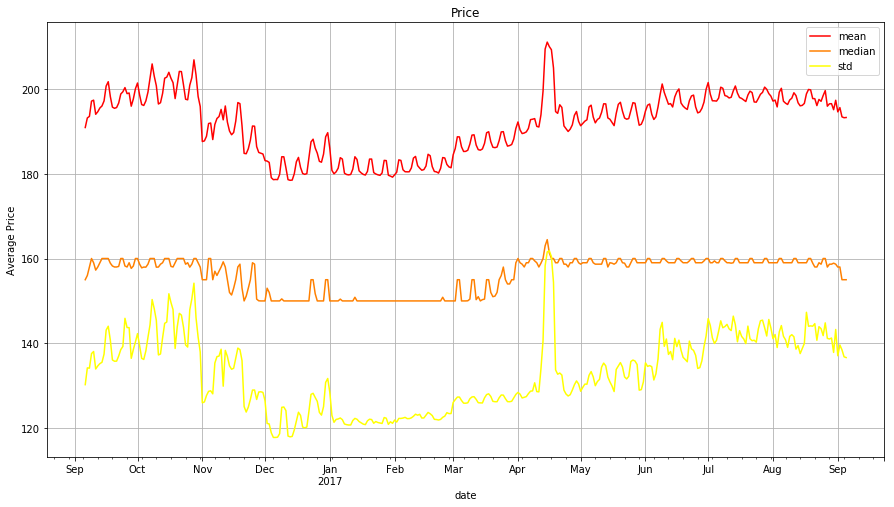

In [7]:
# Plot in 1 Figure avg, median, and std of the Daily Price

calendarDF['price'].resample('D').agg(['mean', 'median', 'std']).plot(grid=True, colormap='autumn', figsize=(15, 8), title='Price')
plt.ylabel('Average Price')
plt.show()

In [8]:
"""Tranformation of data to Daily and Monthly by average"""

avg_Monthly = calendarDF['price'].resample('M').mean()
avg_Daily = calendarDF['price'].resample('D').mean()

In [9]:
avg_Monthly.index = avg_Monthly.index.to_period('M')
avg_Monthly.head()

date
2016-09    196.904770
2016-10    200.519651
2016-11    190.071302
2016-12    182.415309
2017-01    181.137583
Freq: M, Name: price, dtype: float64

In [10]:
avg_Daily.head()

date
2016-09-06    190.873547
2016-09-07    193.128644
2016-09-08    193.502016
2016-09-09    197.092755
2016-09-10    197.325396
Freq: D, Name: price, dtype: float64

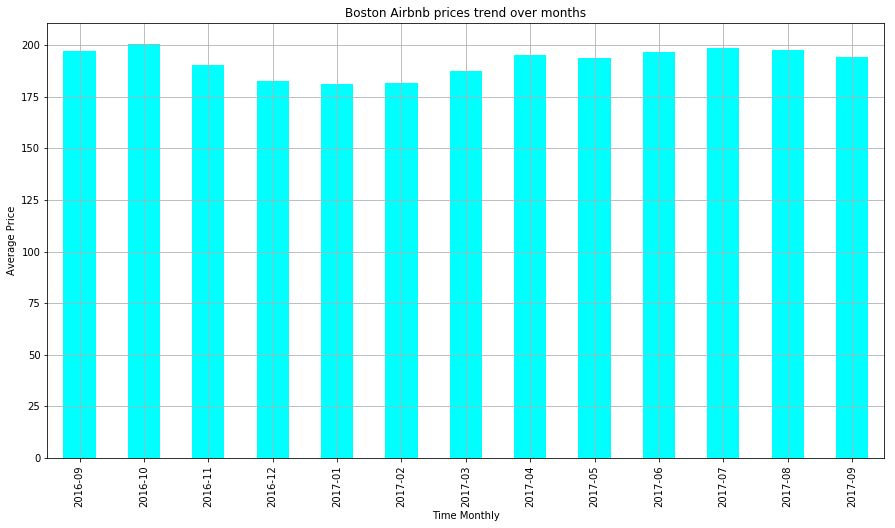

In [11]:
avg_Monthly.plot(kind='bar', grid=True, colormap='cool', figsize=(15, 8), title='Boston Airbnb prices trend over months')
plt.ylabel('Average Price')
plt.xlabel('Time Monthly')
plt.show()

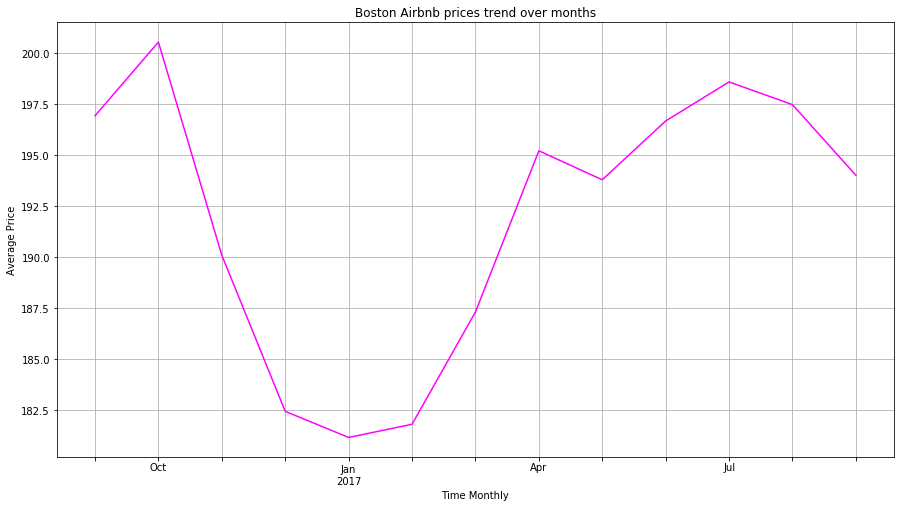

In [12]:
avg_Monthly.plot(grid=True, colormap='spring', figsize=(15, 8), title='Boston Airbnb prices trend over months')
plt.ylabel('Average Price')
plt.xlabel('Time Monthly')
plt.xticks(avg_Monthly.index)
plt.show()

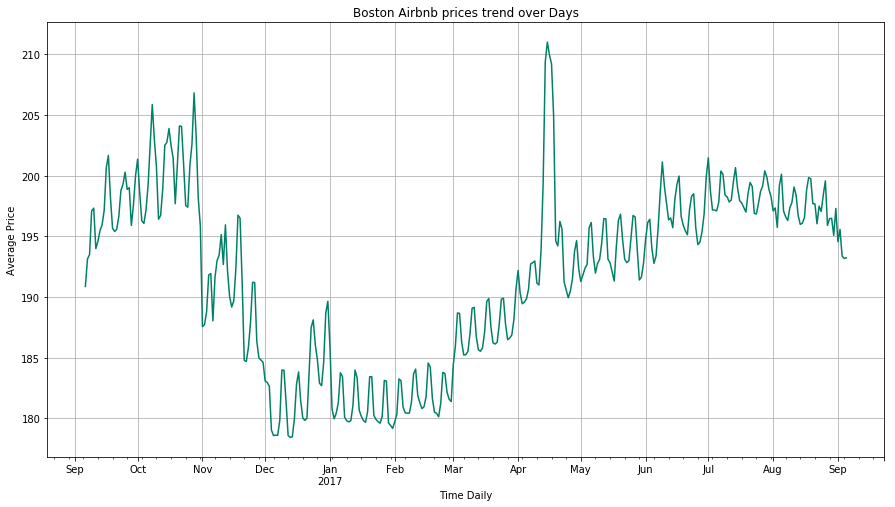

In [13]:
avg_Daily.plot(grid=True, colormap='summer', figsize=(15, 8), title='Boston Airbnb prices trend over Days')
plt.ylabel('Average Price')
plt.xlabel('Time Daily')
plt.show()

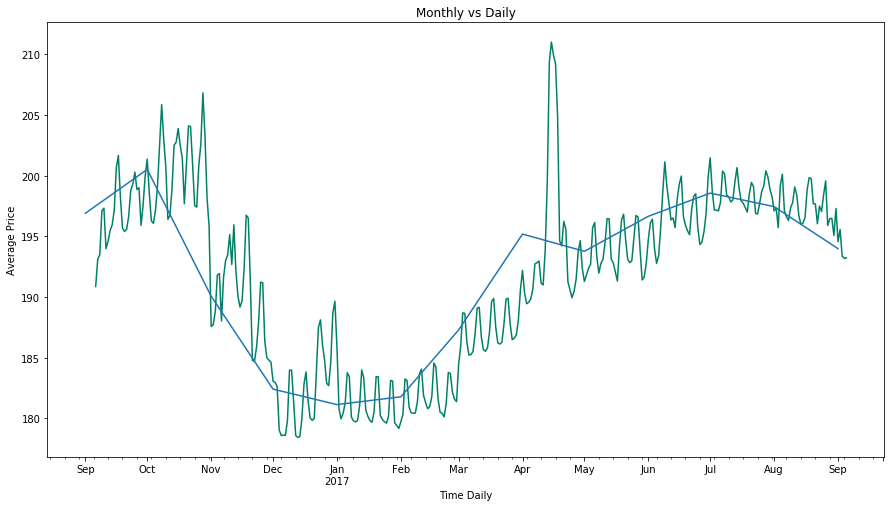

In [14]:
ax = avg_Daily.plot(grid=True, colormap='summer', figsize=(15, 8), title='Monthly vs Daily')
avg_Monthly.plot(ax = ax)
plt.ylabel('Average Price')
plt.xlabel('Time Daily')
plt.show()

In [16]:
"""Input Holidays Feature"""

import holidays #To Marks Holidays Date

daysDF = pd.DataFrame(avg_Daily)
daysDF['Holidays'] = False
daysDF['Holidays_Name'] = None
for date, holiday in holidays.US(years=[2016, 2017]).items() :
    if date in daysDF.index :
        daysDF['Holidays'][date] = True
        daysDF['Holidays_Name'][date] = holiday

C:\Users\Data Scientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Data Scientist\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [25]:
daysDF['Name_of_Day'] = daysDF.index.day_name()
daysDF = daysDF.rename(columns={'price':'avg_price'})

In [26]:
daysDF.head()

,avg_price,Holidays,Holidays_Name,Name_of_Day
date,,,,
2016-09-06,190.873547,False,None,Tuesday
2016-09-07,193.128644,False,None,Wednesday
2016-09-08,193.502016,False,None,Thursday
2016-09-09,197.092755,False,None,Friday
2016-09-10,197.325396,False,None,Saturday


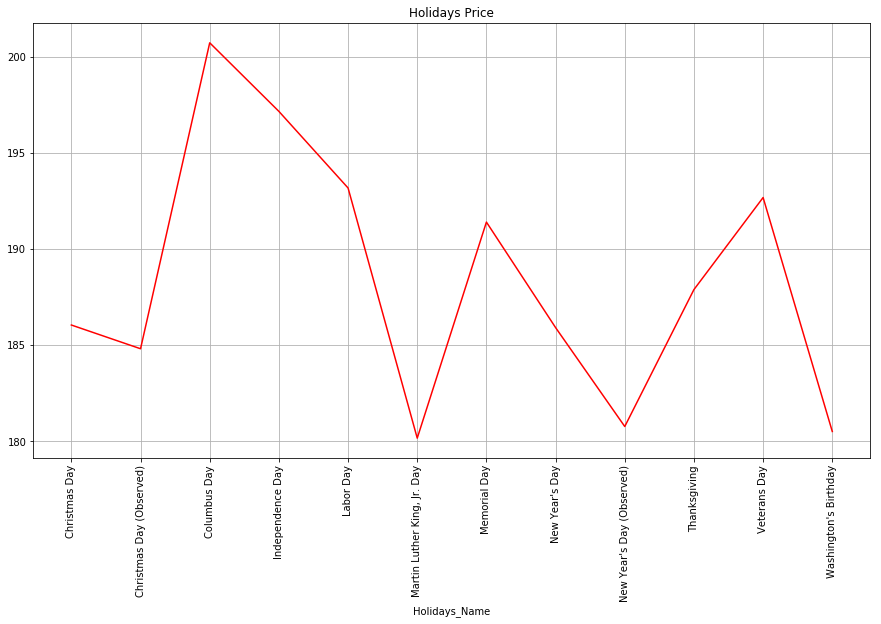

In [27]:
# Avg Price in Holidays

price_holidays = daysDF.groupby('Holidays_Name')['avg_price'].mean()
price_holidays.plot(grid=True, colormap='autumn', figsize=(15, 8), title='Holidays Price')
plt.xticks(np.arange(len(price_holidays)), price_holidays.index, rotation=90)
plt.show()

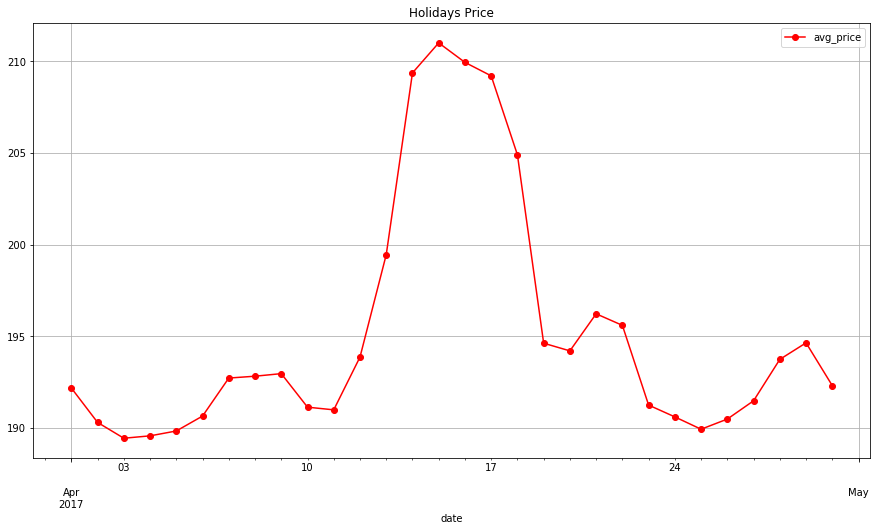

In [28]:
#Find max avg_price day

daysDF['2017-04'].plot(grid=True, colormap='autumn', figsize=(15, 8), title='Holidays Price', style='ro-')
plt.show()

In [29]:
# the max price in day 15th

daysDF[daysDF.index=='2017-04-15']

,avg_price,Holidays,Holidays_Name,Name_of_Day
date,,,,
2017-04-15,211.010778,False,None,Saturday


In [30]:
#Inpect max price in Holidays

daysDF[daysDF['Holidays_Name']=='Columbus Day']

,avg_price,Holidays,Holidays_Name,Name_of_Day
date,,,,
2016-10-10,200.730262,True,Columbus Day,Monday


In [31]:
# Inspect Highest Monthly avg_price (2016 - October)

print('Number of Holidays in October : {}'.format(daysDF.loc['2016-10', 'Holidays'].sum()))
print(daysDF['2016-10'])

Number of Holidays in October : 1
             avg_price  Holidays Holidays_Name Name_of_Day
date                                                      
2016-10-01  201.365221     False          None    Saturday
2016-10-02  198.545841     False          None      Sunday
2016-10-03  196.282306     False          None      Monday
2016-10-04  196.073144     False          None     Tuesday
2016-10-05  197.147404     False          None   Wednesday
2016-10-06  199.211504     False          None    Thursday
2016-10-07  202.604870     False          None      Friday
2016-10-08  205.861786     False          None    Saturday
2016-10-09  202.991330     False          None      Sunday
2016-10-10  200.730262      True  Columbus Day      Monday
2016-10-11  196.414745     False          None     Tuesday
2016-10-12  196.723059     False          None   Wednesday
2016-10-13  198.905004     False          None    Thursday
2016-10-14  202.501443     False          None      Friday
2016-10-15  202.752272

In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Data
[nltk_data]     Scientist\AppData\Roaming\nltk_data...


True